Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [ ]:
dataset = pd.read_csv('bank_transactions.csv')
dataset.head()
X = dataset.iloc[:, 5:]
X = X.drop(columns=['TransactionDate'])

In [ ]:
print(X)

         CustAccountBalance  TransactionTime  TransactionAmount (INR)
0                  17819.05           143207                     25.0
1                   2270.69           141858                  27999.0
2                  17874.44           142712                    459.0
3                 866503.21           142714                   2060.0
4                   6714.43           181156                   1762.5
...                     ...              ...                      ...
1048562             7635.19           184824                    799.0
1048563            27311.42           183734                    460.0
1048564           221757.06           183313                    770.0
1048565            10117.87           184706                   1000.0
1048566            75734.42           181222                   1166.0

[1048567 rows x 3 columns]


In [ ]:
#Check null values
a = X.isnull().sum()
b = X.isnull().mean()*100
missing_values = pd.concat([a , b] , axis = 1 , keys = ['Missing Values' , 'Percentage of Missing Values'])
missing_values

,Missing Values,Percentage of Missing Values
CustAccountBalance,2369,0.225927
TransactionTime,0,0.000000
TransactionAmount (INR),0,0.000000


In [ ]:
# Since the percentage of missing value is low, dropping missing values will not affect the model
X.dropna(inplace = True)

In [ ]:
# To check how dropna affected the data
print(X)

         CustAccountBalance  TransactionTime  TransactionAmount (INR)
0                  17819.05           143207                     25.0
1                   2270.69           141858                  27999.0
2                  17874.44           142712                    459.0
3                 866503.21           142714                   2060.0
4                   6714.43           181156                   1762.5
...                     ...              ...                      ...
1048562             7635.19           184824                    799.0
1048563            27311.42           183734                    460.0
1048564           221757.06           183313                    770.0
1048565            10117.87           184706                   1000.0
1048566            75734.42           181222                   1166.0

[1046198 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

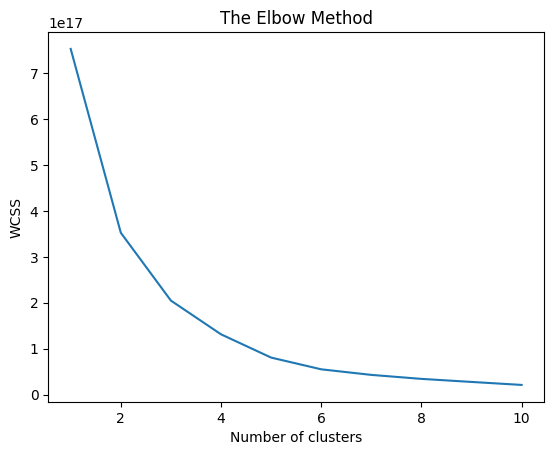

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Check the shape of X and y_kmeans
print("X shape:", X.shape)  # Should be (n_samples, 2)
print("y_kmeans shape:", y_kmeans.shape)  # Should be (n_samples,)

X shape: (1046198, 3)
y_kmeans shape: (1046198,)


In [ ]:
# Ensure y_kmeans has all clusters (0 to 4)
print("Unique clusters in y_kmeans:", np.unique(y_kmeans))  # Should be [0, 1, 2, 3, 4]

Unique clusters in y_kmeans: [0 1 2 3 4]


In [ ]:
X = X.values # make X a numpy array

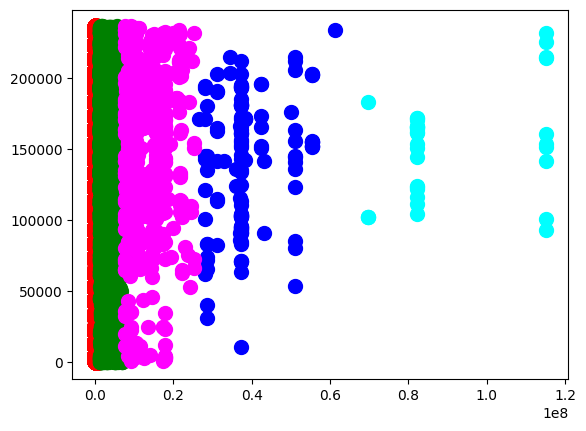

In [ ]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

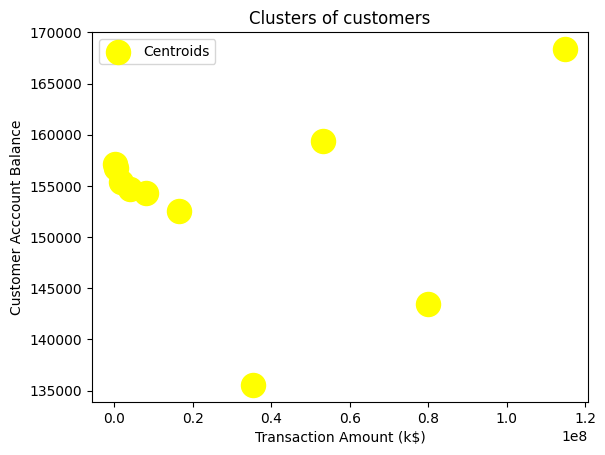

In [ ]:
# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Adding labels and legend
plt.title('Clusters of customers')
plt.xlabel('Transaction Amount (k$)')
plt.ylabel('Customer Acccount Balance')
plt.legend()
plt.show()

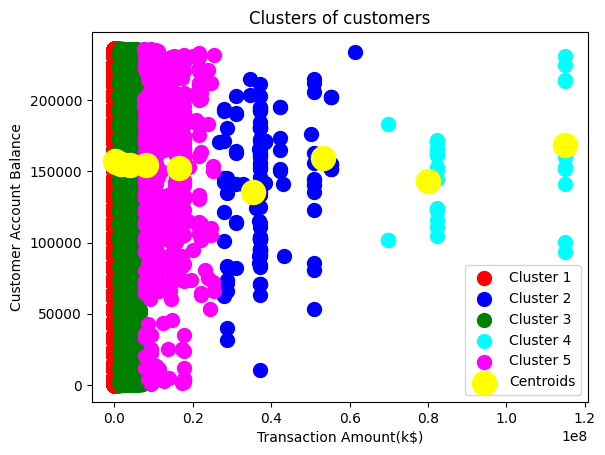

In [ ]:
# Visualising the clusters with centroids on the same graph
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Transaction Amount(k$)')
plt.ylabel('Customer Account Balance')
plt.legend()
plt.show()

USING THE AVERAGED SILHOUETTE SCORE

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Find the average silhouette score
silhouette_average = []

for k in list(range(2,11)):
    #Create model in k clusters
    model = KMeans(n_clusters = k)
    model.fit(df1_scaled)
    cluster_labels = model.labels_
    #Compute silhouette score in each cluster
    score = silhouette_score(df1_scaled , cluster_labels).round(3)
    #Append score to the list
    silhouette_average.append([score , k])

print(silhouette_average)